Importing the necessary libraries

In [ ]:
import pandas as pd  # For data manipulation
from sklearn.preprocessing import StandardScaler  # For normalizing the data
from sklearn.cluster import KMeans  # For K-Means clustering
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced data visualization

Loading the dataset

In [ ]:
data = pd.read_csv(r'/content/Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# Select the relevant columns for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

Normalising the data using scaler object and displaying the scaled data

In [ ]:
# Normalize the data
scaler = StandardScaler()  # Create a scaler object
X_scaled = scaler.fit_transform(X)  # Fit and transform the data

# Display the scaled data
print(X_scaled[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


Applying K-Means clustering algorithm by creating a KMeans object with 5 clusters and n_init set to 10 and fitting the model and predict cluster labels

In [ ]:
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Create a KMeans object with 5 clusters and n_init set to 10
clusters = kmeans.fit_predict(X_scaled)  # Fit the model and predict cluster labels

# Add the cluster labels to the original dataframe
data['Cluster'] = clusters

# Display the first few rows with the cluster labels
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        1  
1        1  
2        0  
3        1  
4        1  


Visualising the clusters by importing matplotlib.pyplot for plotting

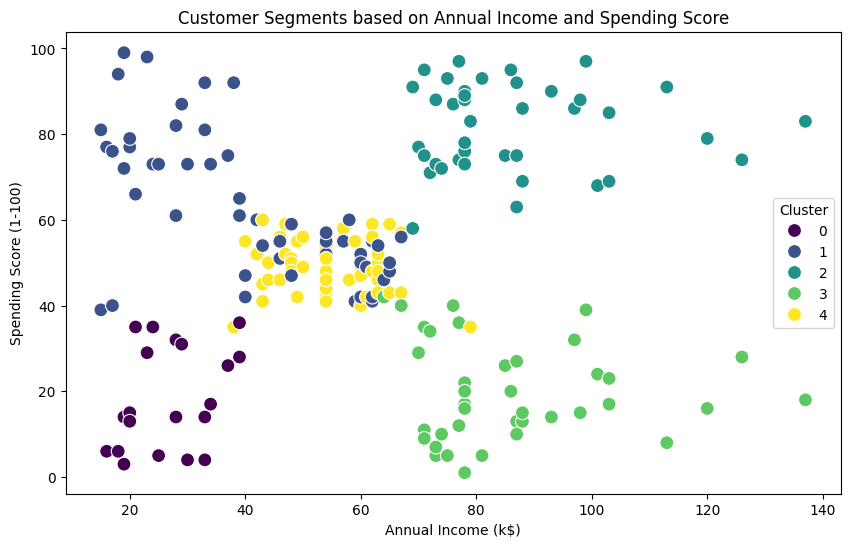

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()